In [1]:
import GOES

In [2]:
# Infos da Regiao

flist=GOES.locate_files('C:\\Users\\Durso\\Documentos\\_Iniciacao Cientifica\\NC Files\\Lightining Detection\\', 'OR_GLM*.nc',
                        '20220215-000000', '20220216-000000')

In [3]:
ds = GOES.open_mfdataset(flist)

ds

<class 'GOES.processing.processing_data.open_mfdataset'>

number files: 15
C:\Users\Durso\Documentos\_Iniciacao Cientifica\NC Files\Lightining Detection\OR_GLM-L2-LCFA_G16_s20220461600000_e20220461600200_c20220461600216.nc
C:\Users\Durso\Documentos\_Iniciacao Cientifica\NC Files\Lightining Detection\OR_GLM-L2-LCFA_G16_s20220461600200_e20220461600400_c20220461600417.nc
C:\Users\Durso\Documentos\_Iniciacao Cientifica\NC Files\Lightining Detection\OR_GLM-L2-LCFA_G16_s20220461600400_e20220461601000_c20220461601017.nc
C:\Users\Durso\Documentos\_Iniciacao Cientifica\NC Files\Lightining Detection\OR_GLM-L2-LCFA_G16_s20220461601000_e20220461601200_c20220461601219.nc
C:\Users\Durso\Documentos\_Iniciacao Cientifica\NC Files\Lightining Detection\OR_GLM-L2-LCFA_G16_s20220461601200_e20220461601400_c20220461601425.nc
C:\Users\Durso\Documentos\_Iniciacao Cientifica\NC Files\Lightining Detection\OR_GLM-L2-LCFA_G16_s20220461601400_e20220461602000_c20220461602026.nc
C:\Users\Durso\Documentos\_Iniciacao 

In [4]:
#domain = [-44.64728755494618, -41.74140391311923, -23.380671724510133, -21.60441389915291]

domain = [-86.0,-31.0,-40.0,15.0]

In [5]:
flash_lon = ds.variable('flash_lon')
flash_lat = ds.variable('flash_lat')

In [6]:
time_bounds = ds.variable('product_time_bounds')
time_start = time_bounds.data[0,0]
time_end = time_bounds.data[-1,-1]

In [7]:
ti = ds.variable('flash_time_offset_of_first_event')
tf = ds.variable('flash_time_offset_of_last_event')
flash_time = ti.data+(tf.data-ti.data)/2.0

In [8]:
from matplotlib.dates import date2num
flash_time_num = date2num(flash_time)

In [9]:
sat = ds.attribute('platform_ID')[0]

In [10]:
name = 'Flash occurrence'

In [11]:
# import packages
import custom_color_palette as ccp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

ncols = 6

# set the colors of the custom palette
palette = [['gold','orange','red','darkviolet','violet'], ccp.range(1,ncols,1)]

# pass parameters to the creates_palette module
cmap, cmticks, norm, bounds = ccp.creates_palette([palette], extend='both')

# creates ticks for colorbar
ticks = np.linspace(date2num(time_start),date2num(time_end),ncols)

# calculates norm
norm = Normalize(vmin=ticks[0], vmax=ticks[-1])

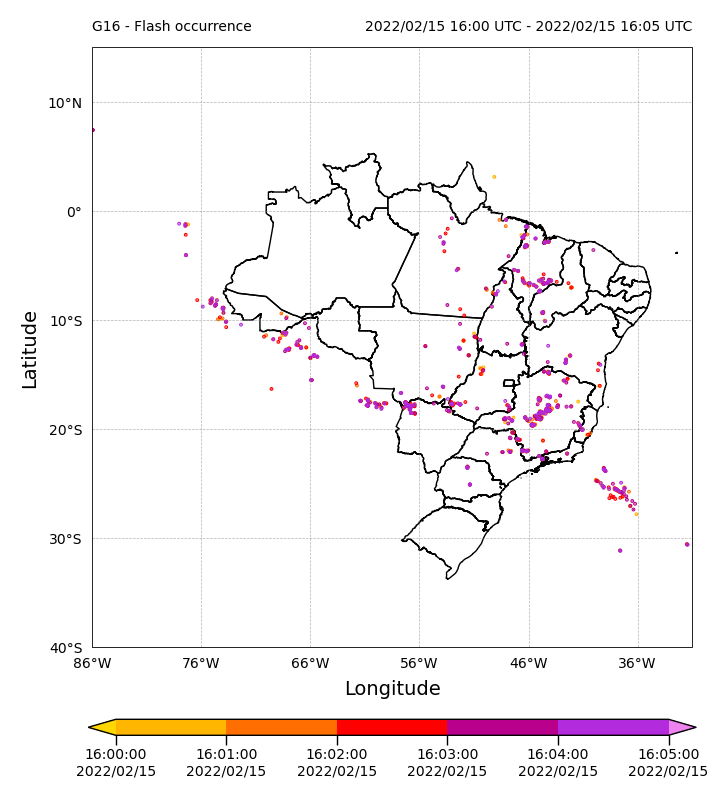

In [14]:
# import packages
import numpy as np
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from matplotlib.dates import DateFormatter
import cartopy.io.shapereader as shpreader  # Import shapefiles

# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=ccrs.PlateCarree(lon_cen))
ax.outline_patch.set_linewidth(0.3)

# add the geographic boundaries
shapefile = list(shpreader.Reader('C:\\Users\\Durso\\Documentos\\_Iniciacao Cientifica\\Countries\\Brasil\\BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.5)

# plot the data
img = ax.scatter(flash_lon.data, flash_lat.data, s=0.15, c=flash_time_num, cmap=cmap, norm=norm,
                 marker='o', transform=ccrs.PlateCarree())

# add the colorbar
cb = plt.colorbar(img, ticks=ticks, format=DateFormatter('%H:%M:%S\n%Y/%m/%d'), extend='both',
                    spacing='proportional', orientation='horizontal',
                    cax=fig.add_axes([0.12, 0.05, 0.76, 0.02]))
cb.ax.tick_params(labelsize=5, labelcolor='black', width=0.5, direction='out', pad=1.0)
cb.outline.set_linewidth(0.5)

# set the title
ax.set_title('{} - {}'.format(sat, name), fontsize=5, loc='left')
ax.set_title('{:%Y/%m/%d %H:%M UTC} - {:%Y/%m/%d %H:%M UTC}'.format(time_start, time_end),
             fontsize=5, loc='right')

# Sets X axis characteristics
dx = 10
xticks = np.arange(domain[0], domain[1]+dx, dx)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(dateline_direction_label=True))
ax.set_xlabel('Longitude', color='black', fontsize=7, labelpad=3.0)

# Sets Y axis characteristics
dy = 10
yticks = np.arange(domain[2], domain[3]+dy, dy)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_ylabel('Latitude', color='black', fontsize=7, labelpad=3.0)

# Sets tick characteristics
ax.tick_params(left=True, right=True, bottom=True, top=True,
               labelleft=True, labelright=False, labelbottom=True, labeltop=False,
               length=0.0, width=0.05, labelsize=5.0, labelcolor='black')

# Sets grid characteristics
ax.gridlines(xlocs=xticks, ylocs=yticks, alpha=0.6, color='gray',
             draw_labels=False, linewidth=0.25, linestyle='--')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]], crs=ccrs.PlateCarree())

plt.show()